In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 150 
np.random.seed(SEED)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold

### Create data point frame

#### Function Building

In [240]:
def create_sample(num_classes = 10,
                  samples_per_class = 300,num_outliers = 10,low_outlier =-5, high_outlier = 5,
                  seed = 42)->list[pd.DataFrame,pd.DataFrame]:
    

    X, y = make_blobs(n_samples = num_classes * samples_per_class, 
                    centers = num_classes, 
                    cluster_std = 1.2, 
                    random_state = seed)
       
    outliers_X = np.random.uniform(low = low_outlier, high = high_outlier, size=(num_outliers, X.shape[1]))
    outliers_y = np.random.randint(0, num_classes, size=num_outliers) 
    
    X = np.vstack([X, outliers_X])
    y = np.hstack([y, outliers_y])
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    df = pd.DataFrame(x_train, columns=['x', 'y'])
    df['class'] = y_train

    df_test = pd.DataFrame(x_test, columns=['x', 'y'])
    df_test['class'] = y_test
    return df, df_test

df, df_test = create_sample(num_classes = 10,samples_per_class = 300, num_outliers = 10)

In [207]:
df.loc[0]

x        4.786636
y        2.625127
class    1.000000
Name: 0, dtype: float64

### Randomly Create Sample for clustering

#### Sample test

In [208]:
np.random.seed(10)
outlier_x = np.random.uniform(low=df['x'].min() , high=df['x'].max())
outlier_y = np.random.uniform(low=df['y'].min() , high=df['y'].max() )
outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

print(outlier_df.to_numpy()[0][0], outlier_df.to_numpy()[0][1])

5.133620978144526 -9.887199991058376


#### Function Building 

In [209]:
def create_outlier(min_x, max_x, min_y, max_y, seed =None)->tuple[float, float]:
    np.random.seed(seed)
    
    outlier_x = np.random.uniform(low=0 - 10 , high=0 + 10)
    outlier_y = np.random.uniform(low=0 - 10, high=0 + 10)
    outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

    return (outlier_df.to_numpy()[0][0],outlier_df.to_numpy()[0][1])

### Visualize randomly point

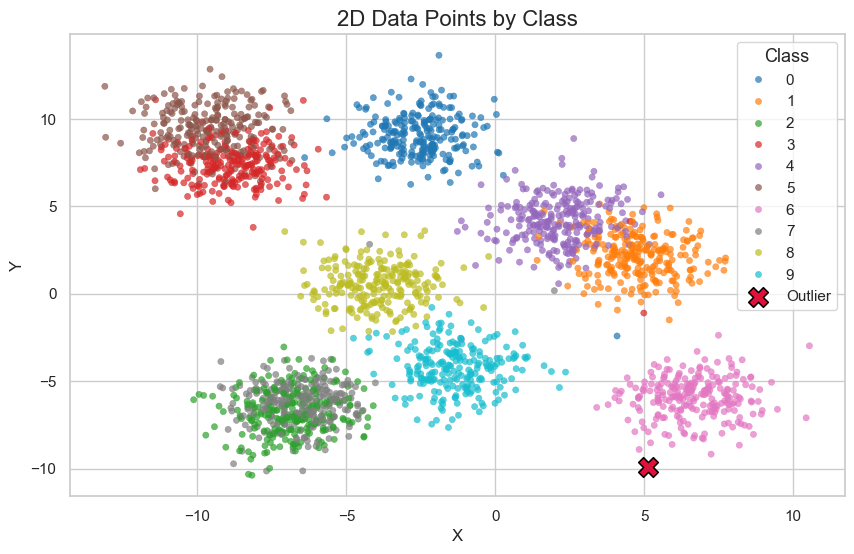

In [210]:
df_combined = pd.concat([df, outlier_df], ignore_index=True)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)
sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                marker='X', label='Outlier', edgecolor='black')

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Calcualte Distance (Euclien Distance)

In [211]:
x_point = df.to_numpy()[:, 0]
y_point = df.to_numpy()[:, 1]
class_point = df.to_numpy()[:, 2].astype(np.uint8)
class_point[0:20]

array([1, 1, 2, 3, 5, 9, 1, 0, 4, 1, 4, 9, 2, 6, 6, 0, 1, 1, 9, 1],
      dtype=uint8)

In [212]:
p_sample_x = outlier_df.loc[0,'x']
p_sample_y = outlier_df.loc[0,'y']
print(f'point_x: {p_sample_x} | point_y: {p_sample_y}')

point_x: 5.133620978144526 | point_y: -9.887199991058376


##### Find out distances and sorting

In [213]:
distance_matrix = np.sqrt((x_point - p_sample_x)**2 + (y_point - p_sample_y)**2)
distance_matrix_sorted = np.sort(distance_matrix)
distance_matrix_sorted[0:10]

array([1.02433812, 1.35671724, 1.49665223, 1.89894613, 1.92616145,
       1.98225565, 2.04065748, 2.21880229, 2.2239593 , 2.23152147])

In [214]:
k_indicate = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:100]]
print(f'indicate: {k_indicate}')
print(f'Class belong to: {class_point[k_indicate]}')

set_indice = set(class_point[k_indicate])
print(f'set indicate: {set_indice}')
repeat = [list(class_point[k_indicate]).count(x) for x in set_indice]
print(f'repeat: {repeat}')
indice_max = np.array(repeat).argmax()
print(f'max indicator: {indice_max}')
print(f'class belong to: {(list(set_indice))[indice_max]}')

indicate: [2341, 1055, 456, 191, 326, 941, 1232, 1131, 2227, 1747, 508, 67, 817, 1024, 1721, 2100, 359, 1197, 364, 179, 641, 1065, 670, 1769, 2217, 122, 1398, 509, 607, 2308, 1365, 1194, 2172, 61, 1218, 1387, 668, 495, 572, 422, 658, 1939, 2304, 287, 1264, 65, 1909, 116, 2052, 1130, 1415, 385, 129, 1246, 459, 1066, 1225, 228, 1719, 2235, 1785, 94, 395, 1548, 1979, 950, 1853, 1380, 863, 877, 187, 1643, 1020, 2331, 1604, 190, 2211, 1285, 785, 2067, 2395, 2016, 2372, 1021, 2201, 36, 786, 530, 880, 1685, 1275, 202, 192, 296, 121, 828, 789, 2141, 182, 305]
Class belong to: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
set indicate: {6}
repeat: [100]
max indicator: 0
class belong to: 6


### Build up knn classifier 

In [276]:
class knn_classifier:
    """
    * Input: 
        * data_point(data_point:pd.DataFram) column 0: 'x', column 1: 'y', column3: 'class'
        data_point(np.array) column 0: 'x', column 1: 'y', column3: 'class'
        * random point(tuple): (x, y)
        * distance
    * Return class with highest probability
    
    """
    def __init__(self,  df:pd.DataFrame,   distance = "euclidean" , k  = 5):
        
        self.k = k 
        self.df = df

        self.x_point = self.df.to_numpy()[:, 0]
        self.y_point = self.df.to_numpy()[:, 1]
        self.class_point = self.df.to_numpy().astype(np.uint8)[:, 2]
        self.distance = distance
        
    def __visualize (self,point_sample):

        outlier_df = pd.DataFrame({'x': [point_sample[0]], 'y': [point_sample[1]], 'class': ['outlier']})

        df_combined = pd.concat([self.df, outlier_df], ignore_index=True)
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)
        plot = sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                        marker='X', label='Outlier', edgecolor='black')

        plot.set_title('2D Data Points by Class', fontsize=16)
        plot.set_xlabel('X', fontsize=12)
        plot.set_ylabel('Y', fontsize=12)
        plot.legend(title='Class', title_fontsize='13', fontsize='11')

        plt.savefig('knn.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def euclieanDis(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:
        return np.sqrt((x-x_sample)**2 + (y-y_sample)**2)

    def manhattanDis(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:

        return np.abs((x - x_sample) + (y-y_sample)) 
    
    def predict(self,point_sample, visualize = False):
        """
        Return: Predict the class the point belongs to
        ________________________________________________________________________________________________
        * Args: randomly sample (tuple data type): x_sample = point_sample[0], y_sample = point_sample[1]

        * Example:
            >>> np.random.seed(42)
            >>> df = create_data_point()
            >>> p_sample_x, p_sample_ = create_sample(df)
            >>> p_sample_x, p_sample_y = (11.659134346998647, 9.862241861392949)
            >>> knn =  knn_classifier(df, (p_sample_x, p_sample_y), "euclidean", _k=5)
            >>> knn.predict((p_sample_x, p_sample_y ), visualize = True)
            >>> 4
        """
        if visualize:
            self.__visualize(point_sample)

        if self.distance == "euclidean":
            distance_matrix = self.euclieanDis(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
        elif self.distance == "manhattan":
            distance_matrix = self.manhattanDis(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
            
        distance_matrix_sorted = np.sort(distance_matrix)

        k_indice = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:self.k]]
        set_indice = set(self.class_point[k_indice])

        repeat = [list(self.class_point[k_indice]).count(x) for x in set_indice]
        indice_max = np.array(repeat).argmax()
        
        return (list(set_indice))[indice_max] 

In [216]:
df.head()

,x,y,class
0,4.786636,2.625127,1
1,4.585176,2.265177,1
2,-4.618124,-5.028217,2
3,-9.112648,6.130304,3
4,-11.832000,8.931972,5


In [265]:
print(df.to_numpy().shape)
print(df.to_numpy().astype(np.uint8)[:, 2].shape)
knn =  knn_classifier(df, "euclidean", k = 10)

(2709, 3)
(2709,)
class_point shape: (2709,)


point sample: (7.177785345860794, -2.545776900494401)


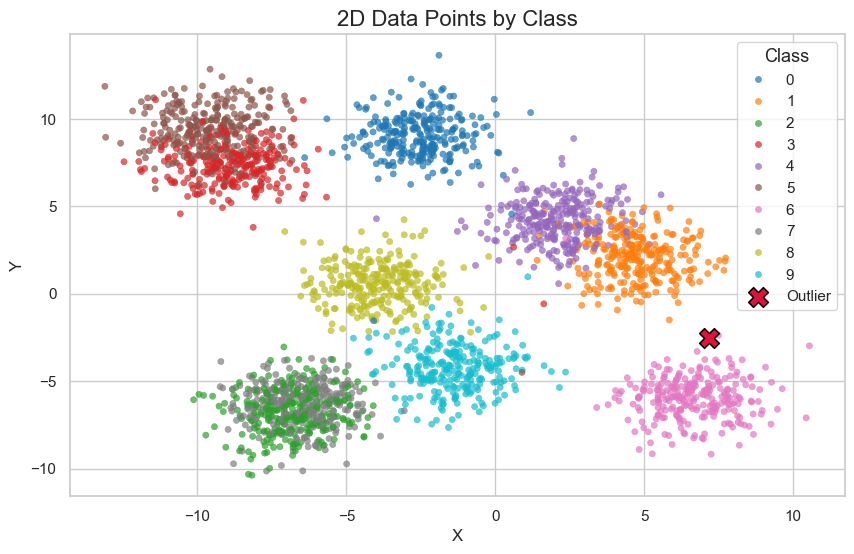

Class Prediction: 6


In [268]:
point_sample  = create_outlier(min_x=df['x'].min(),
                                           max_x=df['x'].max(),
                                           min_y=df['y'].min(),
                                           max_y=df['y'].max(),seed=32)
print(f'point sample: {point_sample}')
predict_class = knn.predict(point_sample,visualize=True)
print(f'Class Prediction: {predict_class}')

### Select K by Cross Validation

In [269]:
def create_sample(num_classes = 10,
                  samples_per_class = 300,num_outliers = 10,low_outlier =-5, high_outlier = 5,
                  seed = 42)->list[pd.DataFrame,pd.DataFrame]:
    

    X, y = make_blobs(n_samples = num_classes * samples_per_class, 
                    centers = num_classes, 
                    cluster_std = 1.2, 
                    random_state = seed)
       
    outliers_X = np.random.uniform(low = low_outlier, high = high_outlier, size=(num_outliers, X.shape[1]))
    outliers_y = np.random.randint(0, num_classes, size=num_outliers) 
    
    X = np.vstack([X, outliers_X])
    y = np.hstack([y, outliers_y])

    return X,y
X,y = create_sample(num_classes = 10,samples_per_class = 300, num_outliers = 10)

### Visualization 

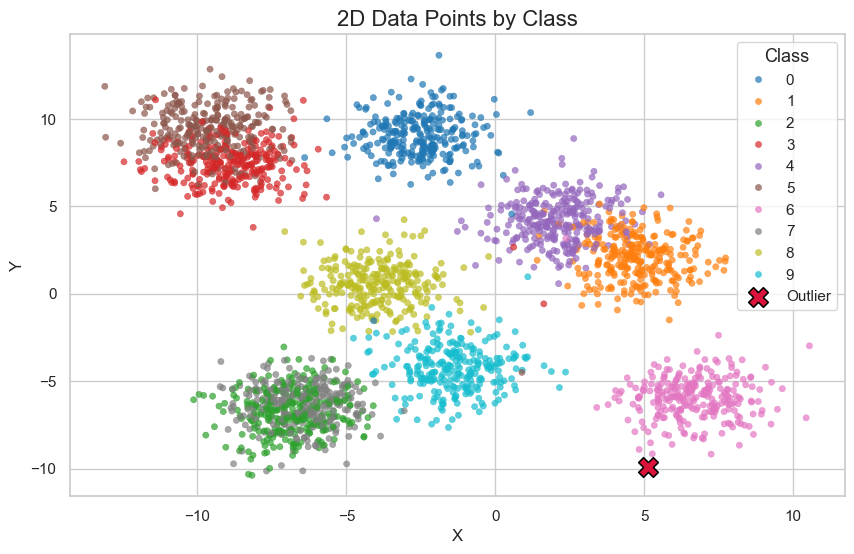

In [270]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)
sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                marker='X', label='Outlier', edgecolor='black')

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

In [271]:
kf = KFold(n_splits = 10, shuffle=True, random_state=42)  

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(X_test[0][0])

    print(X_test.shape[0])
    print(X_train.shape)
    print(y_train.shape)

    print(X_test.shape)
    print(y_test.shape)
    break

0.07353803854636598
301
(2709, 2)
(2709,)
(301, 2)
(301,)


In [272]:
print(X.shape)
print(y.shape)

(3010, 2)
(3010,)


In [291]:
k_value = [x for x in range(0,10) if x%2==1] 
kf = KFold(n_splits = 10, shuffle=True, random_state=42)  

for index ,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    df = pd.DataFrame(X_train, columns=['x', 'y'])
    df['class'] = y_train
    print(f'KFold = {index} ')
    for num_k in k_value:
        accuracy_best = 0.0; precision_best = 0.0; recall_best = 0.0; f1_best = 0.0
       
        knn =  knn_classifier(df, "euclidean", k = num_k)
        y_true = y_test
        y_pred = []
        for i in range(X_test.shape[0]):
            point_sample = (X_test[i][0],X_test[i][1])
            predict_class = knn.predict(point_sample,visualize=False)
            y_pred.append(int(predict_class))

        y_pred = np.array(y_pred)  

        accuracy = accuracy_score(y_true, y_pred)
        if(accuracy_best<accuracy):
            accuracy_best =  accuracy

        precision = precision_score(y_true, y_pred, average='weighted')
        if(precision_best<precision):
            precision_best = precision

        recall = recall_score(y_true, y_pred, average='weighted')
        if(recall_best<recall):
            recall_best = recall
        
        f1 = f1_score(y_true, y_pred, average='weighted')
        if(f1_best<f1):
            f1_best = f1
        
        print(f'KNN = {num_k} | Accuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | Best F1-Score: {f1:.2f}')
    print(f"        | Best Accuracy: {accuracy_best:.2f} | Best Precision: {precision_best:.2f} | Best Recall: {recall_best:.2f} | Best F1-Score: {f1_best:.2f}")

KFold = 0 
KNN = 1 | Accuracy: 0.83 | Precision: 0.83 | Recall: 0.83 | Best F1-Score: 0.83
KNN = 3 | Accuracy: 0.85 | Precision: 0.85 | Recall: 0.85 | Best F1-Score: 0.85
KNN = 5 | Accuracy: 0.88 | Precision: 0.88 | Recall: 0.88 | Best F1-Score: 0.88
KNN = 7 | Accuracy: 0.88 | Precision: 0.88 | Recall: 0.88 | Best F1-Score: 0.88
KNN = 9 | Accuracy: 0.86 | Precision: 0.86 | Recall: 0.86 | Best F1-Score: 0.86
        | Best Accuracy: 0.86 | Best Precision: 0.86 | Best Recall: 0.86 | Best F1-Score: 0.86
KFold = 1 
KNN = 1 | Accuracy: 0.79 | Precision: 0.80 | Recall: 0.79 | Best F1-Score: 0.79
KNN = 3 | Accuracy: 0.81 | Precision: 0.81 | Recall: 0.81 | Best F1-Score: 0.81
KNN = 5 | Accuracy: 0.81 | Precision: 0.82 | Recall: 0.81 | Best F1-Score: 0.81
KNN = 7 | Accuracy: 0.81 | Precision: 0.82 | Recall: 0.81 | Best F1-Score: 0.81
KNN = 9 | Accuracy: 0.80 | Precision: 0.81 | Recall: 0.80 | Best F1-Score: 0.80
        | Best Accuracy: 0.80 | Best Precision: 0.81 | Best Recall: 0.80 | Best F1-